In [1]:
from matplotlib import pyplot as plt 

In [2]:
from keras.models import Model, load_model

Using TensorFlow backend.


In [3]:
model = load_model("adam_model.h5")

In [4]:
path = '/home/auv/Sahil/dogs-vs-cats/'

In [5]:
target_size=(224, 224)

In [7]:
img_path = path+'test1/19.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1_input (InputLayer)  (None, 224, 224, 3)       0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
__________

In [19]:
layer_name = 'conv2d_1'

In [20]:
layer_output = model.get_layer(layer_name).output

In [21]:
print (model.get_layer(layer_name).output_shape)

(None, 224, 224, 64)


In [38]:
from keras import models
activation_model = Model(inputs=model.input, outputs=layer_output)

In [39]:
activations = activation_model.predict(img_tensor)

In [40]:
layer_activation = activations[0]
print(layer_activation.shape)

(224, 224, 64)


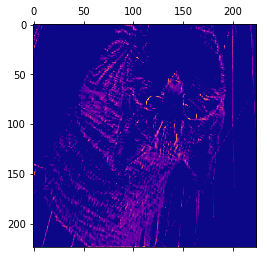

In [41]:
plt.matshow(layer_activation[:,:,2], cmap='plasma')
plt.show()

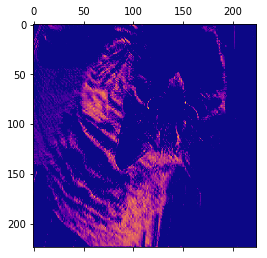

In [42]:
plt.matshow(layer_activation[:,:,19], cmap='plasma')
plt.show()

In [29]:
layer_names = []
for layer in model.layers[:20]:
    layer_names.append(layer.name)
    print(layer.name)

lambda_1_input
lambda_1
conv2d_1
conv2d_2
max_pooling2d_1
conv2d_3
conv2d_4
max_pooling2d_2
conv2d_5
conv2d_6
conv2d_7
max_pooling2d_3
conv2d_8
conv2d_9
conv2d_10
max_pooling2d_4
conv2d_11
conv2d_12
conv2d_13
max_pooling2d_5


In [61]:
images_per_row = 2

In [62]:
#layer_activation.shape[-1]/16
grid_size = np.zeros((244*8, 8*244))
grid_size.shape

(1952, 1952)

In [71]:
##########################################################
############ Visualizing images in a Grid ################
##########################################################

plot_x = layer_activation.shape[-1]/images_per_row
size = layer_activation.shape[1]
plot_y = images_per_row
#f, axarr = plt.subplots(plot_x, plot_y)
for f in range(layer_activation.shape[-1]):
    for i in range(images_per_row):
        filter_image = layer_activation[:,:,f]
        filter_image -= filter_image.mean()
        filter_image /= filter_image.std()
        filter_image += 128
        filter_image = np.clip(filter_image, 0, 255).astype('uint8')
        
        grid_size[plot_x * size : (plot_x + 1) * size,
                 plot_x * size : (plot_x + 1) * size] = filter_image
        
        #axarr[f, i].imshow()

ValueError: could not broadcast input array from shape (224,224) into shape (0,0)

In [45]:
def visualize_Filters(layer_activation):
    num_of_features = layer_activation.shape[-1]
    for i in range(layer_activation.shape[2]):
        plt.matshow(layer_activation[:,:,i], cmap='plasma')
        plt.show()

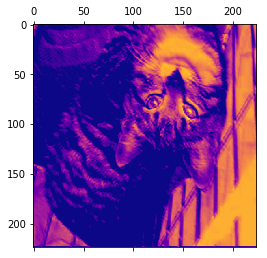

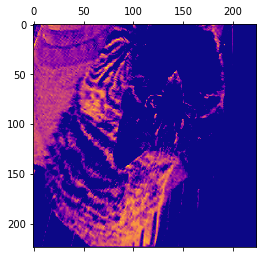

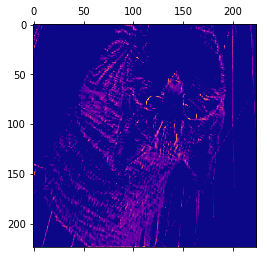

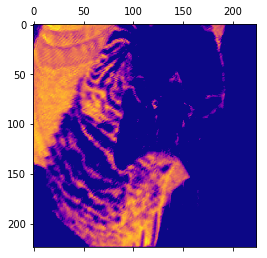

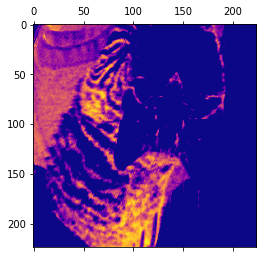

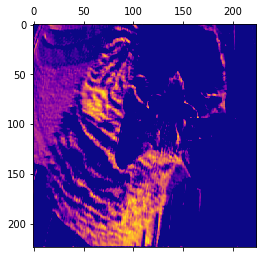

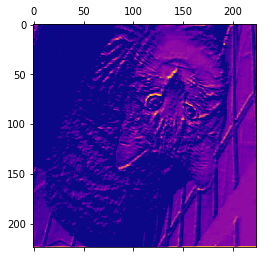

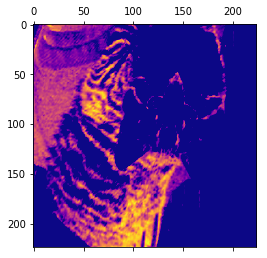

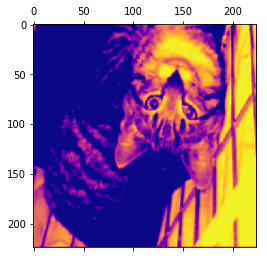

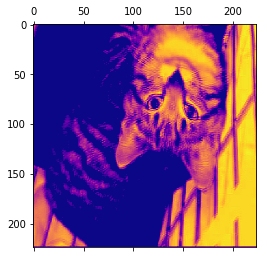

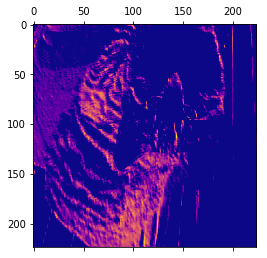

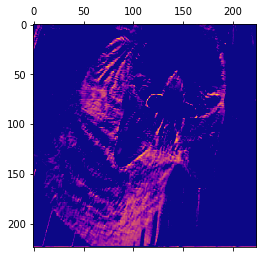

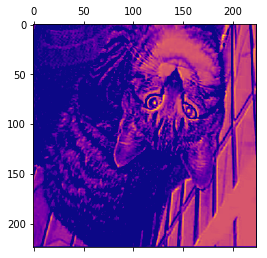

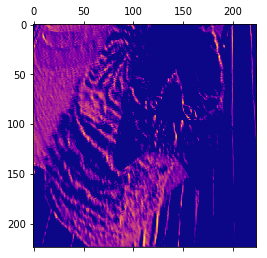

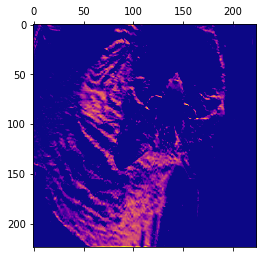

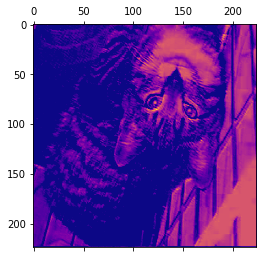

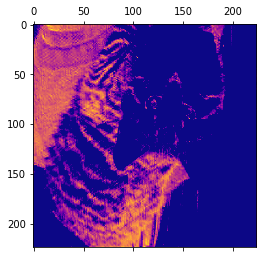

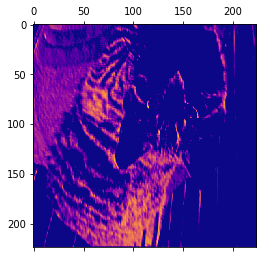

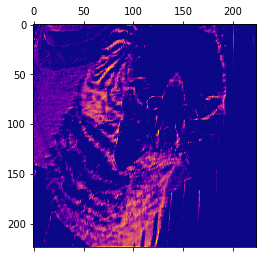

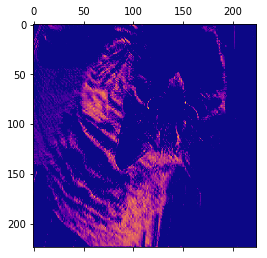

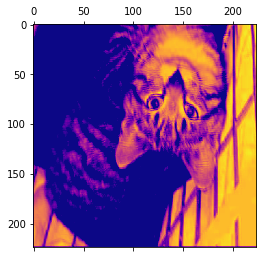

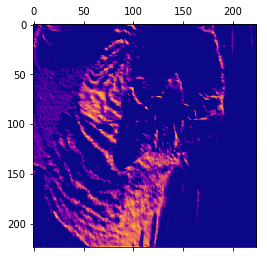

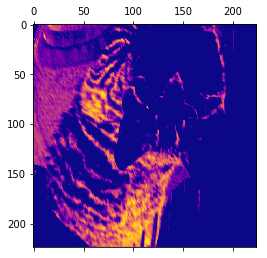

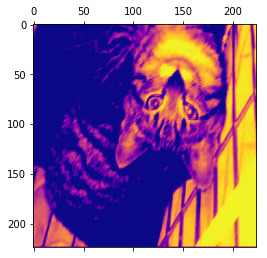

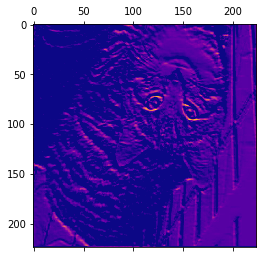

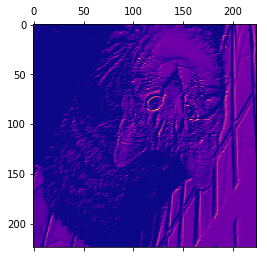

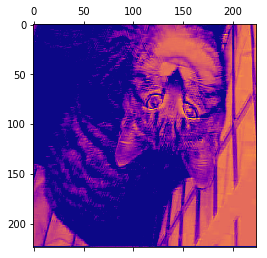

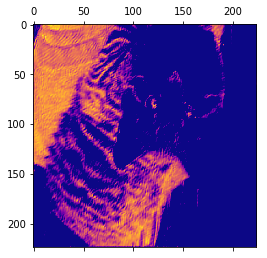

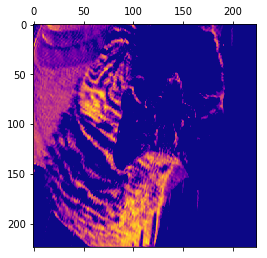

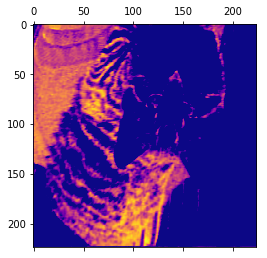

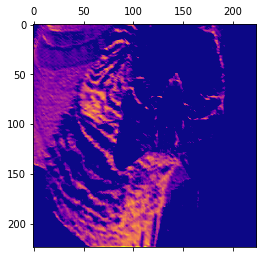

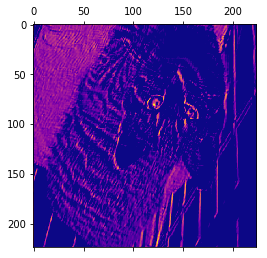

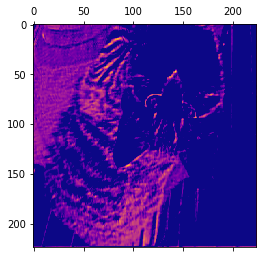

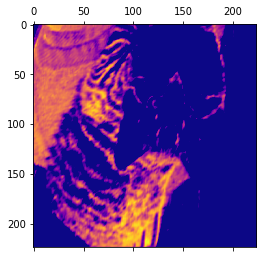

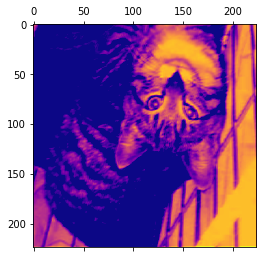

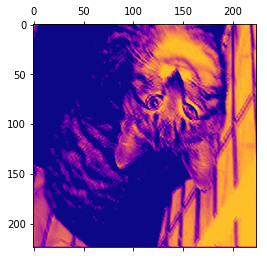

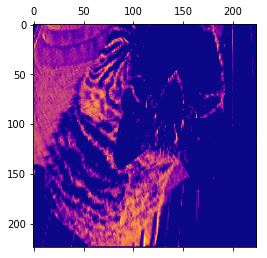

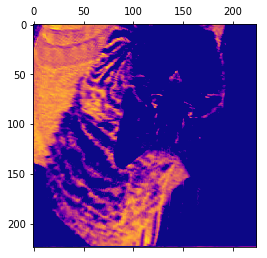

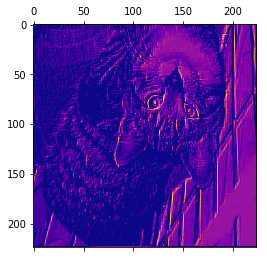

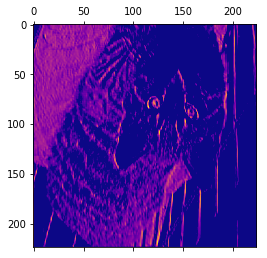

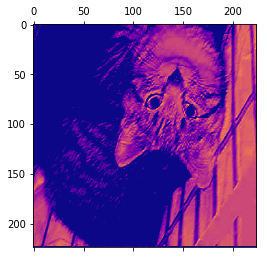

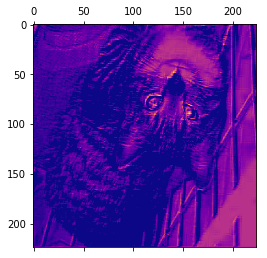

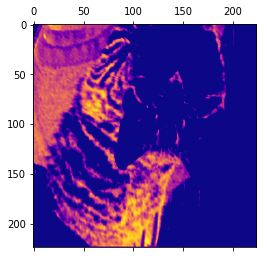

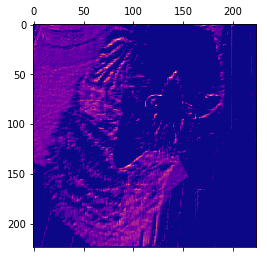

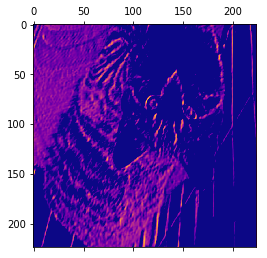

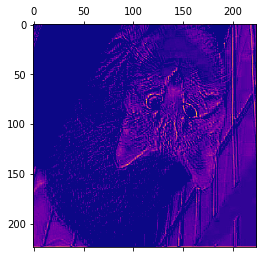

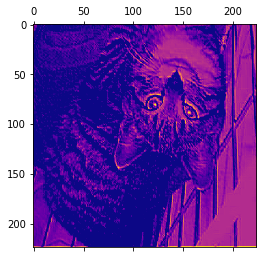

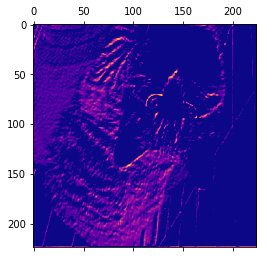

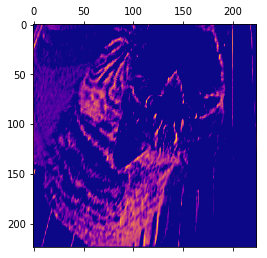

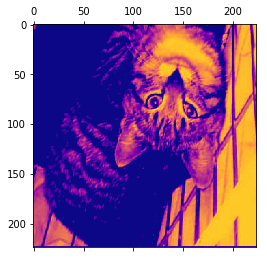

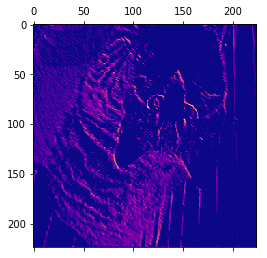

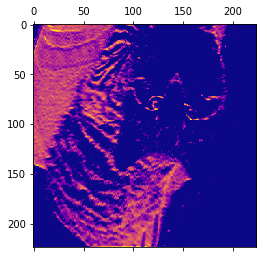

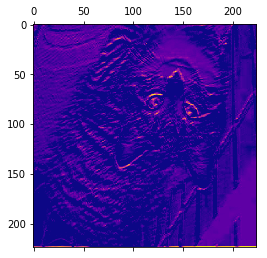

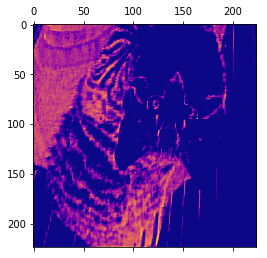

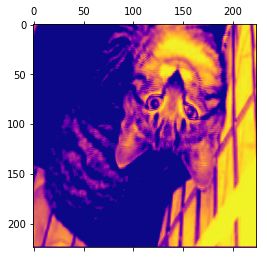

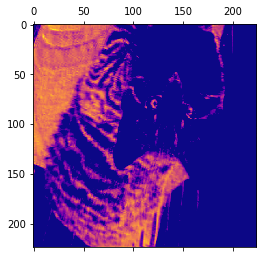

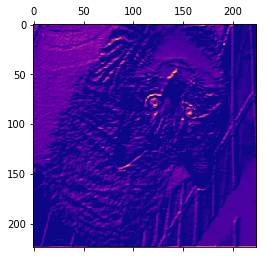

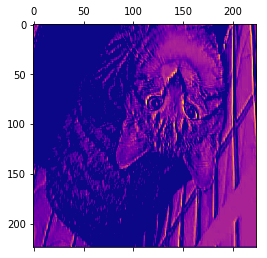

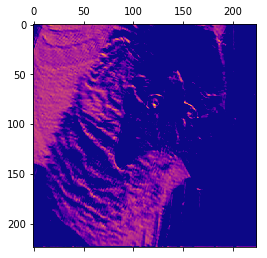

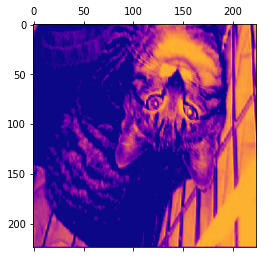

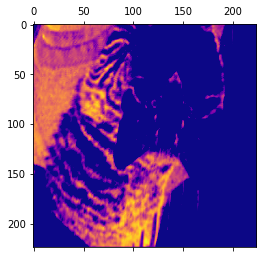

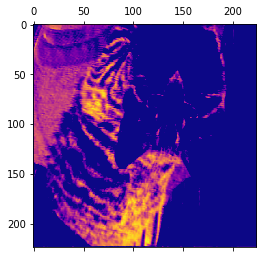

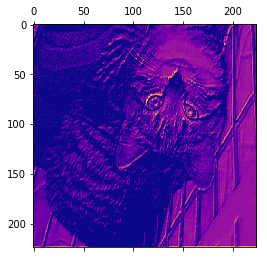

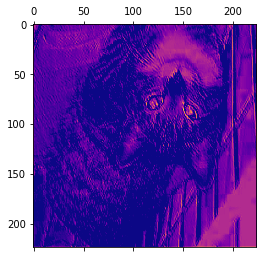

In [43]:
###########################################################
########## Visualizing filters of a layer #################
###########################################################
for i in range(layer_activation.shape[2]):
    plt.matshow(layer_activation[:,:,i], cmap='plasma')
    plt.show()

In [72]:
n_features = layer_activation.shape[-1] # Number of features in the feature map
size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
display_grid = np.zeros((size * n_cols, images_per_row * size))

In [74]:
for col in range(n_cols): # Tiles each filter into a big horizontal grid
    for row in range(images_per_row):
        channel_image = layer_activation[:, :,col * images_per_row + row]
        channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

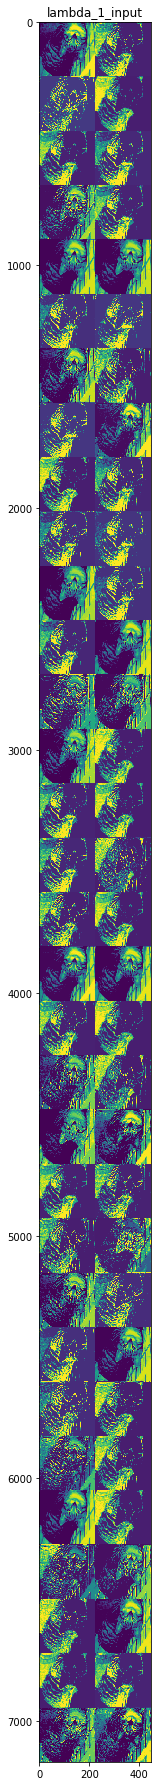

In [75]:
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')